In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
df = pd.read_csv('MOCK_DATA.csv', header="infer")
df.sort_values(by=['fecha de creacion'], inplace=True)
df.head()


,id,nombre,apellidos,email,genero,pais,especialidad medica,tipo de docmumento,numero de docmumento,numero de telefono movil,fecha de creacion
635,636,Corella,Blandamere,cblandamerehn@domainmarket.com,Masculino,Uruguay,Hematologia,tarjeta profesional,5321704198,181-920-2241,2023-01-01
676,677,Abel,Dressel,adresselis@aol.com,Masculino,Ecuador,Pediatria,Cedula,210017856,656-338-4819,2023-01-01
170,171,Evy,Scryne,escryne4q@i2i.jp,Masculino,Guatemala,Dermatologia,Cedula,1413958419,200-410-8635,2023-01-01
410,411,Justin,Linder,jlinderbe@ca.gov,Femenino,Honduras,Pediatria,tarjeta profesional,7632233741,928-620-4512,2023-01-01
399,400,Jayme,Fryatt,jfryattb3@symantec.com,Femenino,Argentina,Ortopedia,Cedula,2287706119,982-888-0979,2023-01-01


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 635 to 217
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1000 non-null   int64 
 1   nombre                    1000 non-null   object
 2   apellidos                 1000 non-null   object
 3   email                     1000 non-null   object
 4   genero                    1000 non-null   object
 5   pais                      1000 non-null   object
 6   especialidad medica       1000 non-null   object
 7   tipo de docmumento        1000 non-null   object
 8   numero de docmumento      1000 non-null   int64 
 9   numero de telefono movil  1000 non-null   object
 10  fecha de creacion         1000 non-null   object
dtypes: int64(2), object(9)
memory usage: 93.8+ KB
None


In [4]:
df.head()

,id,nombre,apellidos,email,genero,pais,especialidad medica,tipo de docmumento,numero de docmumento,numero de telefono movil,fecha de creacion
635,636,Corella,Blandamere,cblandamerehn@domainmarket.com,Masculino,Uruguay,Hematologia,tarjeta profesional,5321704198,181-920-2241,2023-01-01
676,677,Abel,Dressel,adresselis@aol.com,Masculino,Ecuador,Pediatria,Cedula,210017856,656-338-4819,2023-01-01
170,171,Evy,Scryne,escryne4q@i2i.jp,Masculino,Guatemala,Dermatologia,Cedula,1413958419,200-410-8635,2023-01-01
410,411,Justin,Linder,jlinderbe@ca.gov,Femenino,Honduras,Pediatria,tarjeta profesional,7632233741,928-620-4512,2023-01-01
399,400,Jayme,Fryatt,jfryattb3@symantec.com,Femenino,Argentina,Ortopedia,Cedula,2287706119,982-888-0979,2023-01-01


In [5]:
filtros = [ 'genero', 'pais', 'especialidad medica']

data = df.copy()
data["Total"] = 1   # Dummy var para agrupacions
data["Mes"] = pd.to_datetime(data["fecha de creacion"]).dt.month
data["Dia"] = pd.to_datetime(data["fecha de creacion"]).dt.day

data_pais = data.groupby('pais')['Total'].count().reset_index()
data_genero = data.groupby("genero")['Total'].count().reset_index()
data_especialidad = data.groupby('especialidad medica')['Total'].count().reset_index()

data_fecha = data.groupby('fecha de creacion')['Total'].count().reset_index()
data_fecha["Acumulado"] = data_fecha["Total"].cumsum()
data_fecha["Mes"] = pd.to_datetime(data_fecha["fecha de creacion"]).dt.month
data_fecha["Dia"] = pd.to_datetime(data_fecha["fecha de creacion"]).dt.day
data_fecha['Dia de la semana'] =  pd.to_datetime(data_fecha["fecha de creacion"]).dt.day_name(locale='Spanish')

In [6]:
df["especialidad medica"].unique()

array(['Hematologia', 'Pediatria', 'Dermatologia', 'Ortopedia',
       'Cardiologia', 'Gastroenterologia', 'Medicina de familia',
       'Neurologia', 'Medicina general', 'Oncologia', 'Psiquiatria',
       'Endocrinologia'], dtype=object)

In [7]:
df["genero"].unique()

array(['Masculino', 'Femenino'], dtype=object)

In [8]:
df["pais"].unique()

array(['Uruguay', 'Ecuador', 'Guatemala', 'Honduras', 'Argentina',
       'Panama', 'Peru', 'Colombia', 'Chile', 'Mexico', 'Bolivia',
       'Venezuela', 'Cuba', 'Paraguay', 'Costa Rica', 'Puerto Rico'],
      dtype=object)

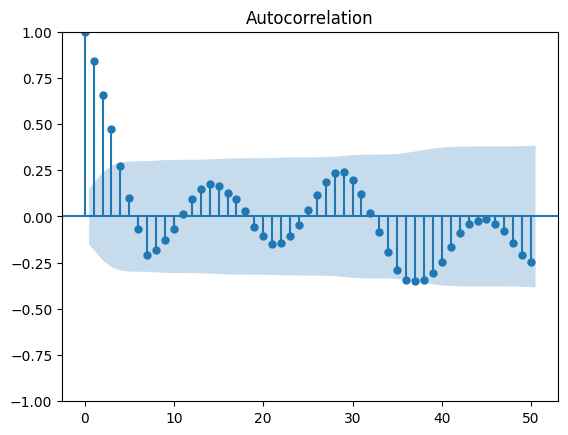

In [21]:

data_fecha['avg_window = 7'] = data_fecha['Total'].rolling(window=7).mean()
# Remove NaN values from 'moving_avg'
data_fecha = data_fecha.dropna(subset=['avg_window = 7'])

week_count_total = data_fecha.groupby("Dia")["Total"].sum().reset_index()
values = week_count_total["Total"]

plot_acf(data_fecha['avg_window = 7'],lags=50)
plt.show()

acf_values = acf(data_fecha['avg_window = 7'],nlags=50)



In [10]:
# Create a Linear Regression model
model = LinearRegression()

# Reshape index array to 2D for .fit() method
X = np.array(range(len(data_fecha['avg_window = 7']))).reshape(-1, 1)
y = data_fecha['avg_window = 7']

# Fit the model
model.fit(X, y)

# Get the linear regression line values
y_pred = model.predict(X)

data_fecha['y_pred'] = y_pred

c:\Users\jpman\Anaconda3\envs\data-analysis\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\jpman\Anaconda3\envs\data-analysis\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['Acumulado'],name="Acumulado"))
fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['avg_window = 7'],name="avg_window = 7", yaxis="y2",marker_color="black"))
fig.add_trace(go.Bar(x=data_fecha['fecha de creacion'], y=data_fecha['Total'],name="Nuevos Dia" , yaxis="y2", marker_color=data_fecha['Dia'] ))
# fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['y_pred'], name='Linear Regression of Moving Average',yaxis="y2", line=dict(color='green')))

fig.update_layout(
    title_text="Subscripciones por dia",
    yaxis2=dict(
        title="Subs por Día",
        overlaying="y",
        side="right",
        range=[0, data_fecha['Total'].max()] 
    ),
    yaxis1 = dict(
        title="Subs Totales",
        side="left",
        showgrid=False
    ),

)

fig.show()

In [12]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['Acumulado'],name="Acumulado"))
fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['avg_window = 7'],name="avg_window = 7", yaxis="y2",marker_color="black"))
# fig.add_trace(go.Bar(x=data_fecha['fecha de creacion'], y=data_fecha['Total'],name="Nuevos Dia" , yaxis="y2", marker_color=data_fecha['Dia'] ))
fig.add_trace(go.Scatter(x=data_fecha['fecha de creacion'], y=data_fecha['y_pred'], name='Linear Regression of Moving Average',yaxis="y2", line=dict(color='green')))

fig.show()

In [13]:
total_mes = data.groupby([ "Mes"]).Total.sum().reset_index()
total_fig = px.bar(total_mes, x="Mes", y="Total", title="Total por mes",color="Total")
total_fig.show()

In [14]:
line_fig = px.bar(data_fecha, x ="Dia", y="Total",facet_row="Mes",color="Total",height=1000 )
line_fig.show()

In [15]:
day_data = data_fecha.groupby("Dia").Total.mean().reset_index(name="avg")
day_data["min"] = data_fecha.groupby("Dia").Total.min().reset_index(name="min")["min"]
day_data["max"] = data_fecha.groupby("Dia").Total.max().reset_index(name="max")["max"]

In [16]:
fig = go.Figure(data=[
    go.Bar(name='min', x=day_data['Dia'], y=day_data['min']),
    go.Bar(name='avg', x=day_data['Dia'], y=day_data['avg']),
    go.Bar(name='max', x=day_data['Dia'], y=day_data['max']),
])

fig.update_layout(barmode='group')

fig.show()


In [17]:
pie_fig = px.sunburst(data, values="Total", path=["genero"],title="Distribución según género")
pie_fig.update_traces(textinfo="label+percent root")
pie_fig.show()

In [18]:
pais_data = data.groupby(["genero","Mes","pais"])["Total"].sum().reset_index(name="Total")
bar_pais_fig = px.histogram(pais_data, x="pais",y="Total",color="genero", barmode="group")
pie_fig = px.sunburst(pais_data, values="Total", path=["pais"], title="Distribución según países")

# bar_pais_fig.show()
pie_fig.update_traces(textinfo="label+percent root")
pie_fig.show(width=5000,height=5000)

In [19]:
esp_data = data.groupby([ "genero","especialidad medica","Mes"])["Total"].sum().reset_index()
bar_esp_fig = px.histogram(esp_data, x="especialidad medica", y="Total", title="Distrubución de especialidades",color="genero",barmode="group")
pie_esp_fig = px.sunburst(esp_data, values="Total",title="Distrubución de especialidades", path=["especialidad medica"])
line_fig = px.line(esp_data, x="Mes", y="Total",facet_row="especialidad medica",height=3000, color="genero")

pie_esp_fig.show()
bar_esp_fig.show()
# line_fig.show()


In [20]:
tree_data = data.groupby([ "especialidad medica","pais",]).Total.sum().reset_index()
tree_fig = px.treemap(
                tree_data,
                path=["pais", "especialidad medica"],
                values='Total',
                color='Total',
                color_continuous_scale='RdBu',
            )
tree_fig.show()